# Learning Seaborn

Start with distribution plots

In [78]:
import seaborn as sns

In [79]:
%matplotlib inline
# plt.show() outside of Jupyter

In [80]:
# to get the same view as Jose, we must use this sns.set(), https://seaborn.pydata.org/tutorial/aesthetics.html
# versions of seaborn prior to 0.8, set() was called on import. On later versions, it must be explicitly invoked
sns.set()
# Get data to plot, Seaborn has some already built in
tips = sns.load_dataset('tips')

In [81]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [82]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB


/Users/2011home/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


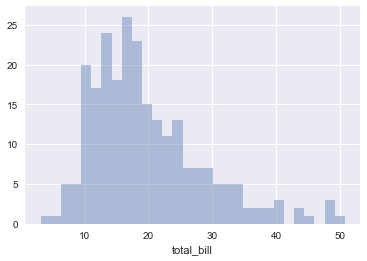

In [83]:
# Univariate distribution plot
sns.distplot(tips['total_bill'], kde = False, bins = 30, hist = True)

/Users/2011home/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/2011home/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


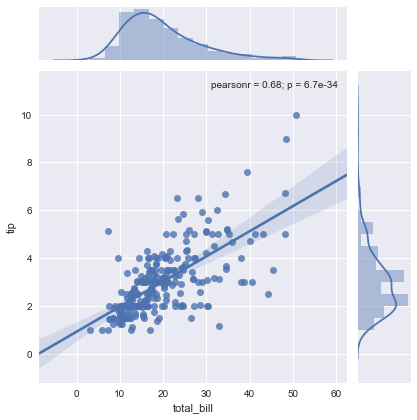

In [84]:
# match two distribution plots for bivariate data
sns.jointplot(x = 'total_bill', y = 'tip', data = tips, kind = 'reg')

In [85]:
# In general we'll use joint plot with default scatter as it's simplest to read

In [86]:
# Now, we can plot pairwise relationships across the entire dataframe

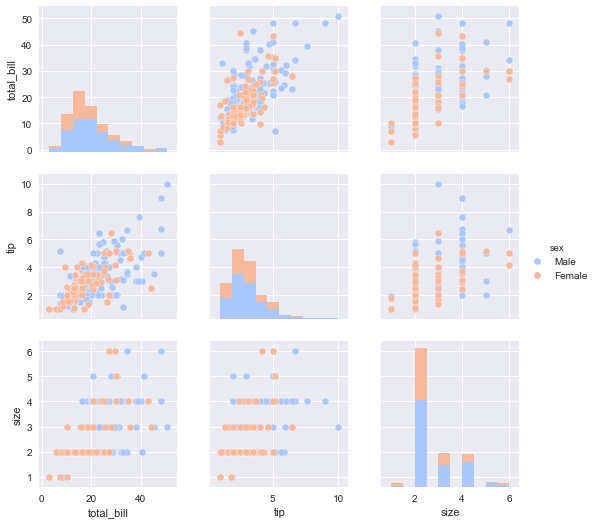

In [87]:
sns.pairplot(tips, hue = 'sex', palette = 'coolwarm')

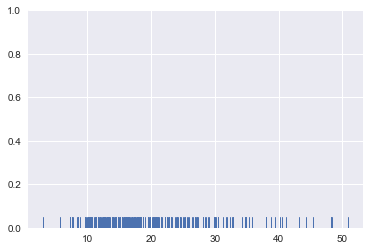

In [88]:
sns.rugplot(tips['total_bill'])

/Users/2011home/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


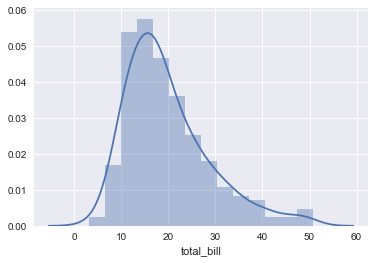

In [89]:
sns.distplot(tips['total_bill'])

(0, 1)

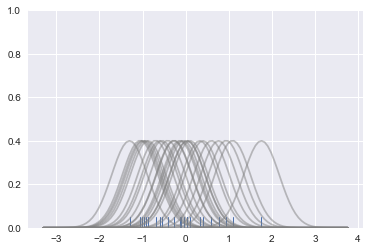

In [90]:
## talking about KDE - Kernel Density Estimation 
# Don't worry about understanding this code!
# It's just for the diagram below
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5,0.98,'Sum of the Basis Functions')

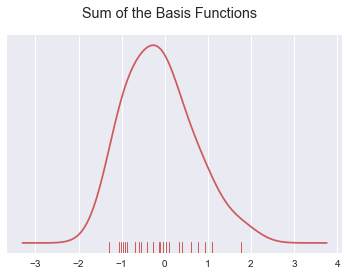

In [91]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

In [92]:
# Reviewing distribution plot types in Seaborn

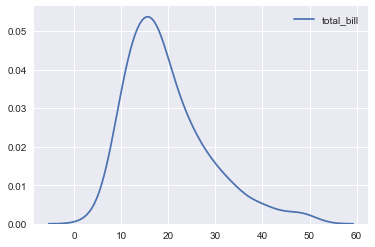

In [93]:
sns.kdeplot(tips['total_bill'])

# Categorical Plots

In [94]:
import seaborn as sns
%matplotlib inline
# plt.show() otherwise

tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


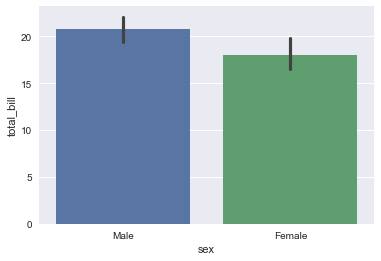

In [95]:
import numpy as np
# Bar plot - defaulted to mean, like a "a groupby" action
sns.barplot(x = 'sex', y = 'total_bill', data = tips)
#average total bill for males is higher than the average total bill for
# females

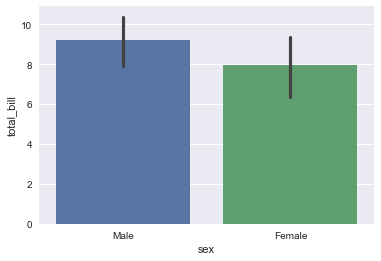

In [96]:
sns.barplot(x = 'sex', y = 'total_bill', data = tips, estimator = np.std)

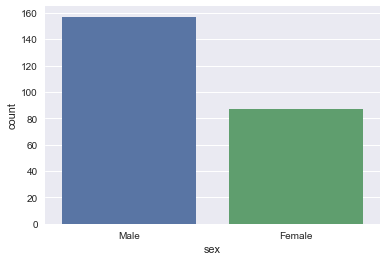

In [97]:
# Count plot
sns.countplot(x = 'sex', data = tips)

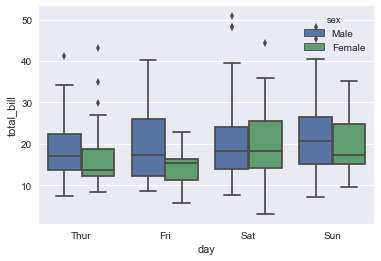

In [109]:
# Box & Whisker Plot
sns.boxplot(x = 'day', y = 'total_bill', data = tips, hue = 'sex')

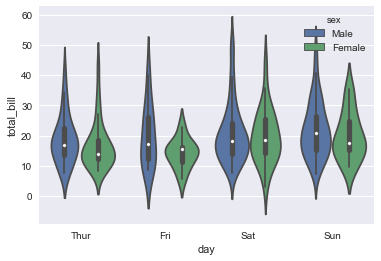

In [115]:
# Violin Plots
sns.violinplot(x = 'day', y = 'total_bill', data = tips, hue = 'sex',
              dodge = True)
# This shows the distribution, the KDE of the underlying distribution

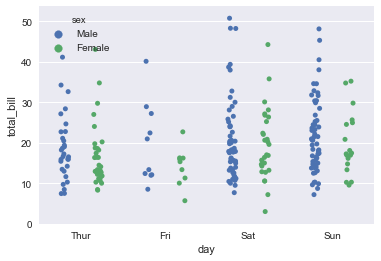

In [117]:
# Strip plot
sns.stripplot(x = 'day', y = 'total_bill', data = tips, jitter = True,
             hue = 'sex', dodge = True)
# draws a scatter plot where one variable is categorical

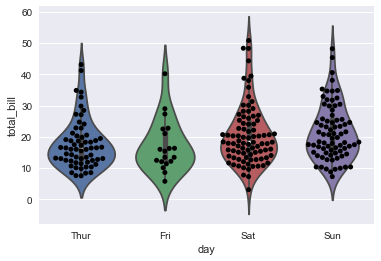

In [119]:
# Swarm plot
sns.violinplot(x = 'day', y = 'total_bill', data = tips)
sns.swarmplot(x = 'day', y = 'total_bill', data = tips, color = 'black')
# similar to a strip plot, but the points dont overlap
# similar to combining a strip plot and a violin plot

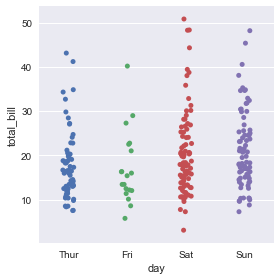

In [125]:
# Factor plot
sns.factorplot(x = 'day', y = 'total_bill', data = tips, kind = 'strip',
              jitter = True)
# Factor plot is a general plotting method and allows you to just enter
# 'kind = "X"' and select the "kind" you want

# Matrix Plots

In [127]:
import seaborn as sns
%matplotlib inline
# plt.show() otherwise

tips = sns.load_dataset('tips')
flights = sns.load_dataset('flights')

tips.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [128]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [134]:
flights.info()
print()
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
year          144 non-null int64
month         144 non-null category
passengers    144 non-null int64
dtypes: category(1), int64(2)
memory usage: 2.9 KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB


In [136]:
# Heatmaps require data to be in matrix form
# matrix-form = the index name and the column name match up so that the
# cell value actually indicates something that is relevant to both names
# IN OTHER WORDS - YOU NEED VARIABLES ON BOTH COLUMNS AND ROWS

In [137]:
# Note that tips is not in matrix form
tips.head()
# 'total_bill' is some sort of label or variable
# a value in the cell is '16.99'
# but the row is not an actual variable

# This can be done through a few methods

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [141]:
tc = tips.corr()
# columns and rows/index variable names indicates a relevancy 
# to both the column and the index name for the cell where they match up

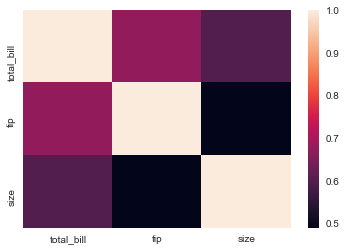

In [142]:
sns.heatmap(tc)

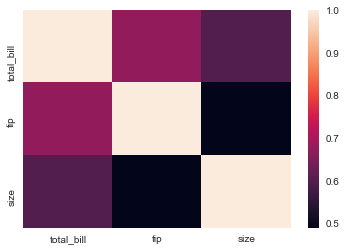

In [143]:
sns.heatmap(tips.corr())

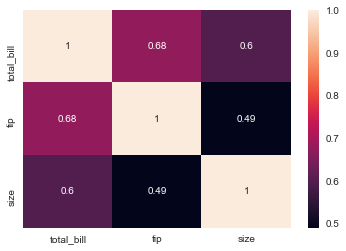

In [144]:
# Annotate the actual values in each of the cells
sns.heatmap(tc, annot = True)

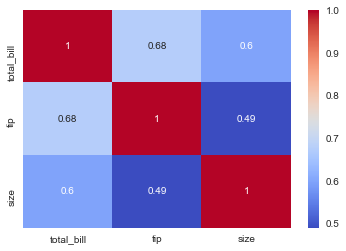

In [146]:
# Change the colormap
sns.heatmap(tc, annot = True, cmap = 'coolwarm')

In [148]:
flights.head()
# This is not in matrix form, lets try something else, pivot

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [151]:
fp = flights.pivot_table(index = 'month', columns = 'year', values = 'passengers')

In [168]:
fp

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


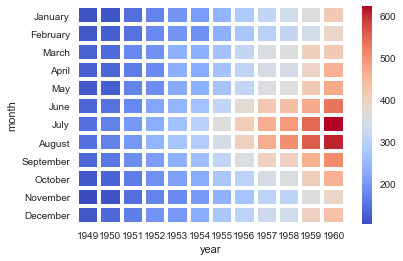

In [161]:
sns.heatmap(fp, cmap = 'coolwarm', linecolor = 'white', linewidths = 3)

In [162]:
# Cluster Map
# Uses hierarchial clustering to produce a clustered version of the heatmap

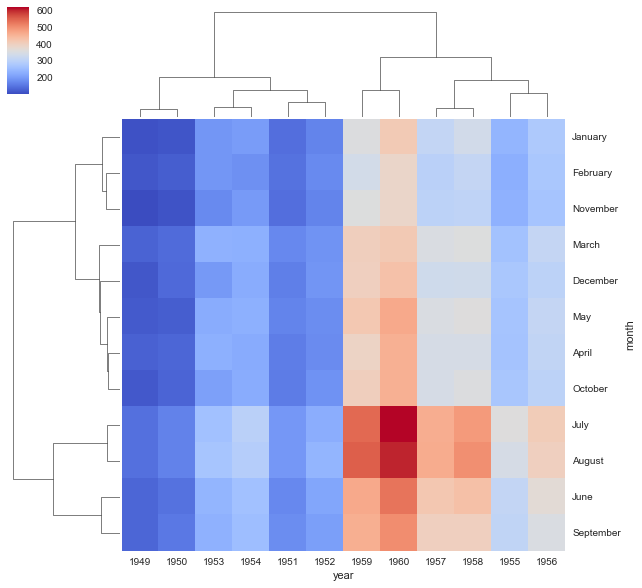

In [164]:
sns.clustermap(fp, cmap = 'coolwarm')

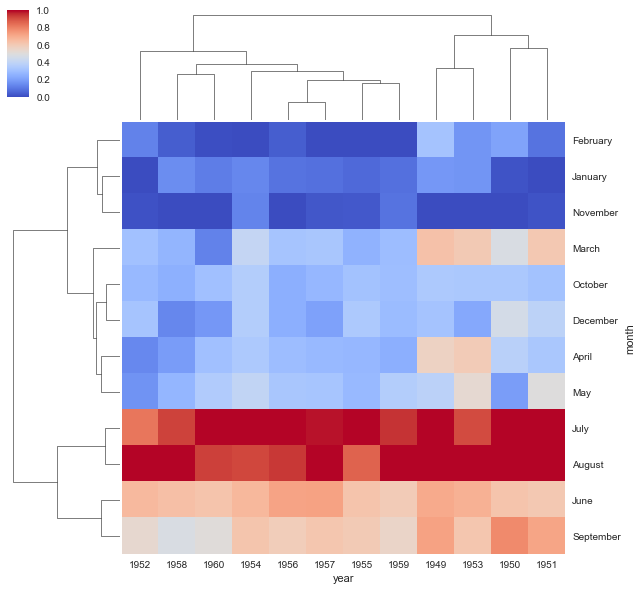

In [165]:
# normalize the scale
sns.clustermap(fp, cmap = 'coolwarm', standard_scale = 1)

In [166]:
#

# Grids

In [167]:
import seaborn as sns
%matplotlib inline
# plt.show() otherwise

iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [169]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [170]:
iris['species'].nunique()

3

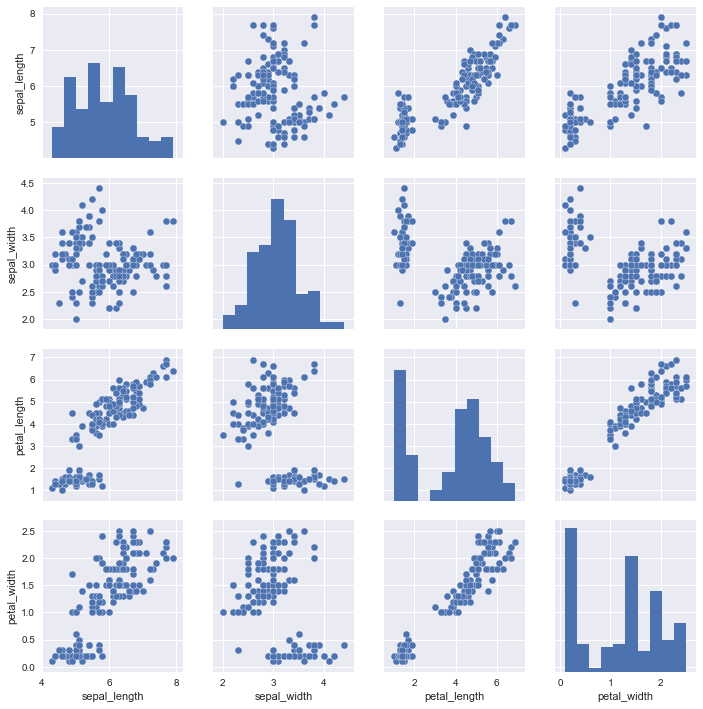

In [171]:
sns.pairplot(iris)

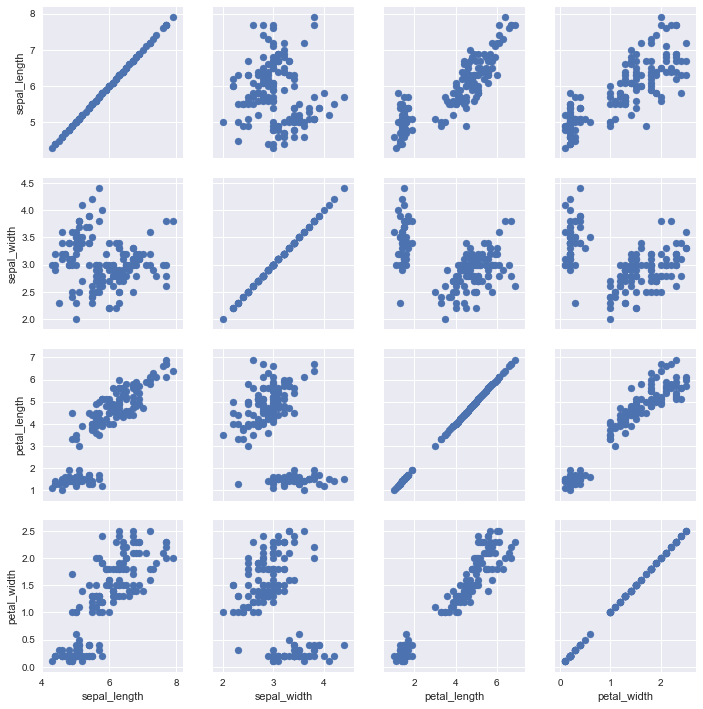

In [173]:
g = sns.PairGrid(iris)
g.map(plt.scatter)

/Users/2011home/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/2011home/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/2011home/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/2011home/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/2011home/anaconda

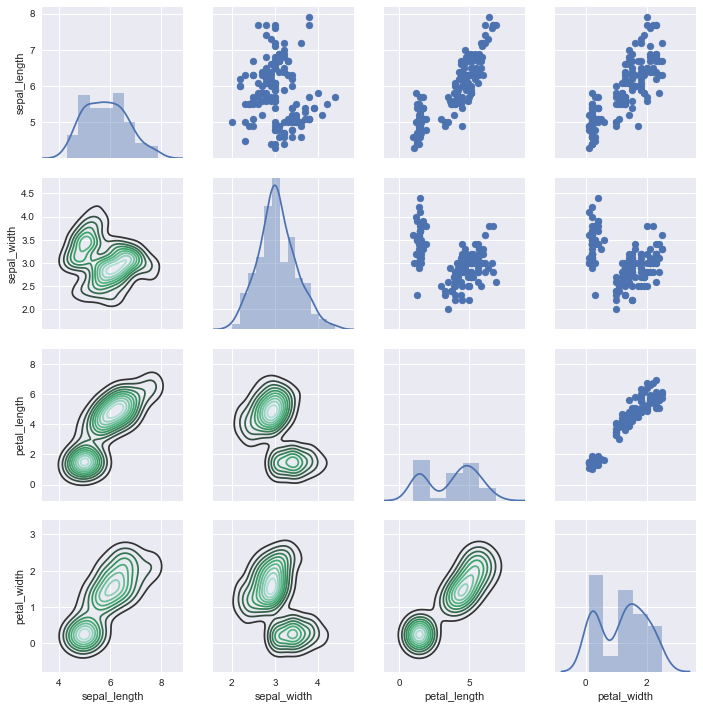

In [174]:
g = sns.PairGrid(iris)
g.map_diag(sns.distplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

In [175]:
# Facet grid
tips = sns.load_dataset('tips')

In [176]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


/Users/2011home/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/2011home/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/2011home/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/2011home/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


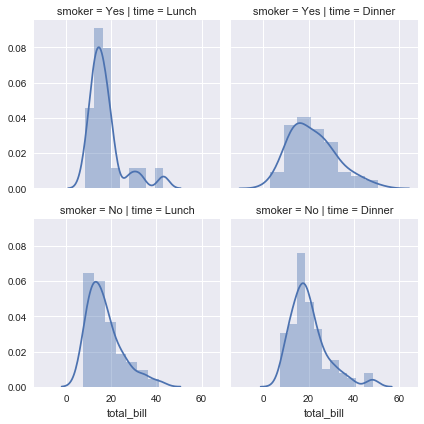

In [181]:
g = sns.FacetGrid(data = tips, col = 'time', row = 'smoker')
g.map(sns.distplot,'total_bill')

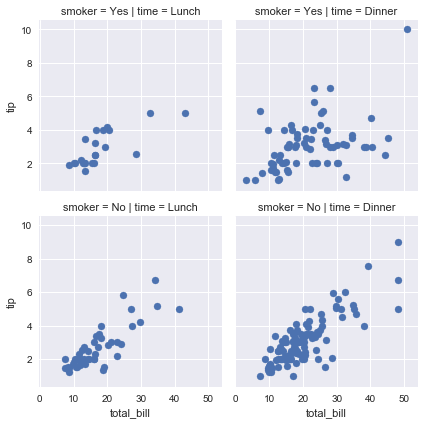

In [184]:
g = sns.FacetGrid(data = tips, col = 'time', row = 'smoker')
g.map(plt.scatter,'total_bill', 'tip') 

In [185]:
#

# Regression Plots

In [186]:
import seaborn as sns
%matplotlib inline
# plt.show() otherwise

tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


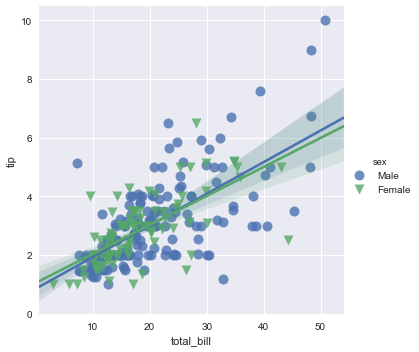

In [193]:
sns.lmplot(x = 'total_bill', y = 'tip', data = tips, hue = 'sex',
          markers = ['o', 'v'], scatter_kws = {'s':100})
# scatter plot changes can be made through matplotlib inputs like marker
# type and marker sizing

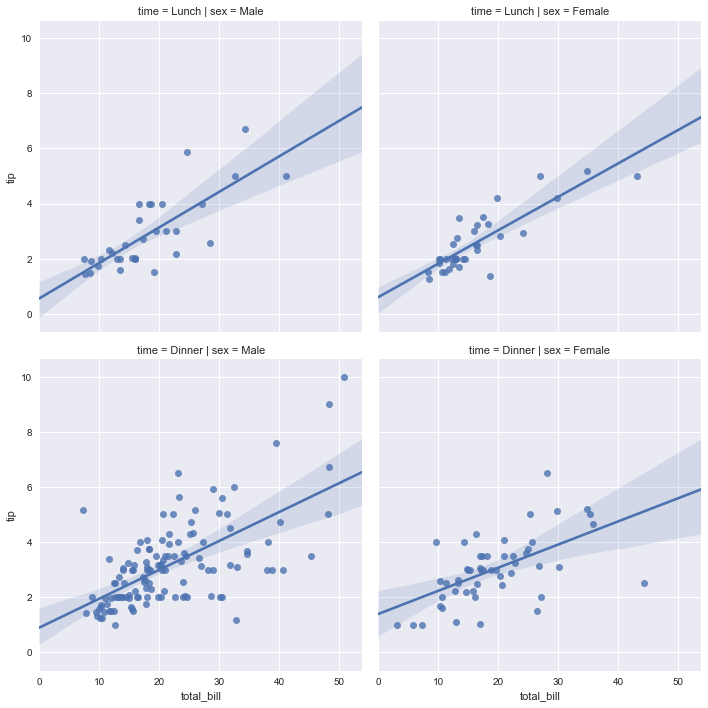

In [203]:
# splitting by something other than 'hue'
# sns.set()
sns.lmplot(x = 'total_bill', y = 'tip', data = tips, col = 'sex',
           row = 'time')

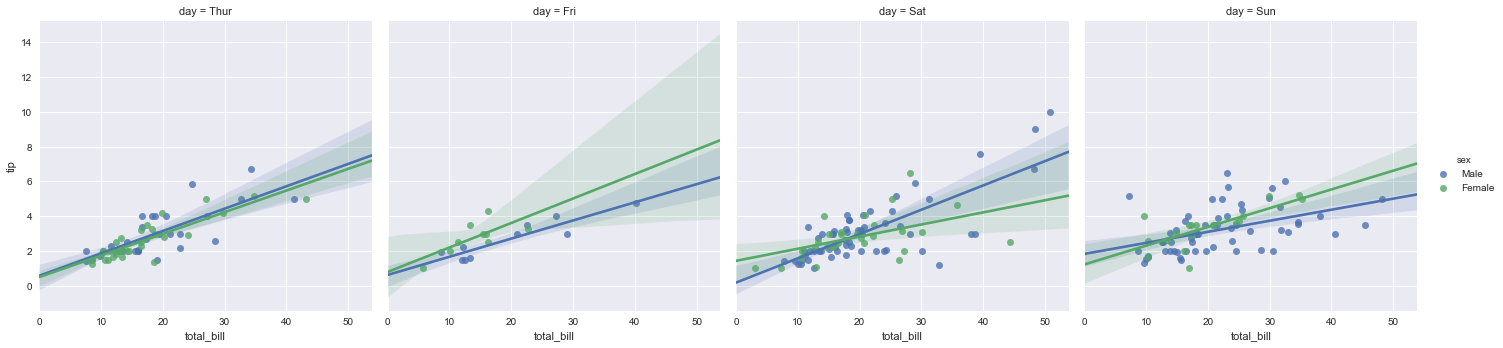

In [206]:
sns.lmplot(x = 'total_bill', y = 'tip', data = tips, col = 'day',
          hue = 'sex')
# adjust this with size and aspect parameters
# Aspect is the ratio between the heighth and width of separate grids

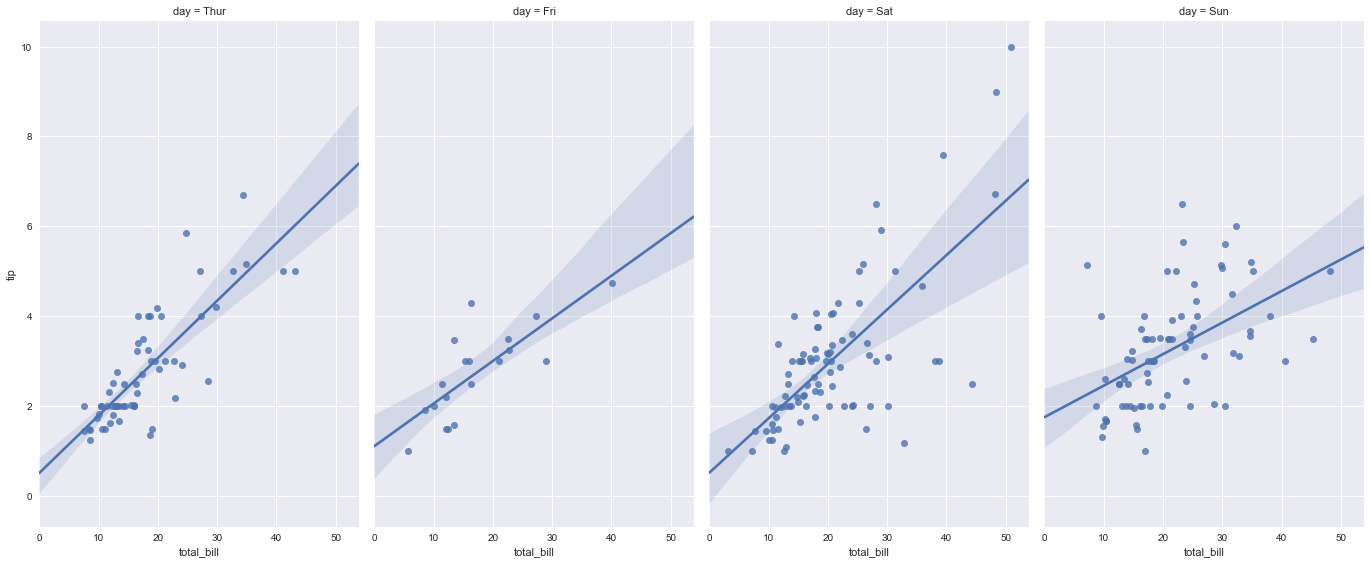

In [208]:
sns.lmplot(x = 'total_bill', y = 'tip', data = tips, col = 'day',
        aspect = 0.6, size = 8)

In [210]:
sns.set()
#

# Style and Color